In [10]:
import pandas as pd
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

all_data_files = os.listdir("../task1")


hard_label_files = [os.path.join(f"../task1/{f}") for f in all_data_files if f.startswith("HardLabel")]
soft_label_files = [os.path.join(f"../task1/{f}") for f in all_data_files if f.startswith("SoftLabelSte")]
kl_label_files = [os.path.join(f"../task1/{f}") for f in all_data_files if f.startswith("SoftLabelKLSte")]
multi_task_label_files = [os.path.join(f"../task1/{f}") for f in all_data_files if f.startswith("MultiTaskStereotype")]

['../task1/HardLabelStereotypeLr1e-5Eps90.csv',
 '../task1/HardLabelStereotypeLr5e-5Eps97.csv',
 '../task1/HardLabelStereotypeLr1e-5Eps97.csv',
 '../task1/HardLabelStereotypeLr5e-5Eps95.csv',
 '../task1/HardLabelStereotypeLr2e-5Eps95.csv',
 '../task1/HardLabelStereotypeLr1e-4Eps95.csv',
 '../task1/HardLabelStereotypeLr1e-5Eps95.csv',
 '../task1/HardLabelStereotypeLr5e-5Eps90.csv',
 '../task1/HardLabelStereotypeLr1e-4Eps90.csv',
 '../task1/HardLabelStereotypeLr2e-5Eps90.csv',
 '../task1/HardLabelStereotypeLr1e-4Eps97.csv',
 '../task1/HardLabelStereotypeLr2e-5Eps97.csv']

# Show statistic about DF

In [11]:
def calculate_confidence_intervals(values, confidence=0.95):
    data = np.array(values)
    mean = np.mean(data)
    std_error = stats.sem(data)
    margin_of_error = std_error * stats.t.ppf((1 + confidence) / 2, len(data) - 1)
    return margin_of_error

In [12]:
def group_by_min_ce(df: pd.DataFrame):
    data = df[df["Data"] ==  "dev"]
    data_grouped = data.groupby("Fold")["ce"]
    data_grouped = data_grouped.idxmin()
    data = data.loc[data_grouped.values][["f1", "ce"]]
    margin_error_f1 = calculate_confidence_intervals(data["f1"])
    margin_error_ce = calculate_confidence_intervals(data["ce"])

    return f"{round(data["f1"].mean(), 4)} ± {round(margin_error_f1, 4)}", f"{round(data["ce"].mean(), 4)} ± {round(margin_error_ce,  4)}"

def calculate_ce_and_f1_from_csv_paths(csv_paths):
    results = []
    for path in csv_paths:
        df = pd.read_csv(path)
        f1, ce = group_by_min_ce(df)
        results.append({"Run": df["Run_name"].unique()[0], 'CE': ce, 'F1': f1})
    return pd.DataFrame(results)


In [13]:
def group_by_f1(df: pd.DataFrame):
    data = df[df["Data"] ==  "dev"]
    data_grouped = data.groupby("Fold")["f1"]
    data_grouped = data_grouped.idxmax()
    data = data.loc[data_grouped.values][["f1", "ce"]]
    margin_error_f1 = calculate_confidence_intervals(data["f1"])
    margin_error_ce = calculate_confidence_intervals(data["ce"])

    return f"{round(data["f1"].mean(), 4)} ± {round(margin_error_f1, 4)}", f"{round(data["ce"].mean(), 4)} ± {round(margin_error_ce,  4)}"

def calculate_ce_and_f1_from_csv_paths_from_f1(csv_paths):
    results = []
    for path in csv_paths:
        df = pd.read_csv(path)
        f1, ce = group_by_f1(df)
        results.append({"Run": df["Run_name"].unique()[0], 'CE': ce, 'F1': f1})
    
    return pd.DataFrame(results)

In [14]:
calculate_ce_and_f1_from_csv_paths(sorted(hard_label_files))

Run               CE               F1
0   HardLabelStereotypeLr1e-4Eps90   0.458 ± 0.0211  0.7991 ± 0.0388
1   HardLabelStereotypeLr1e-4Eps95   0.4692 ± 0.016  0.7828 ± 0.0222
2   HardLabelStereotypeLr1e-4Eps97  0.4701 ± 0.0436  0.7763 ± 0.0744
3   HardLabelStereotypeLr1e-5Eps90  0.4387 ± 0.0173  0.8196 ± 0.0077
4   HardLabelStereotypeLr1e-5Eps95  0.4362 ± 0.0175  0.8214 ± 0.0125
5   HardLabelStereotypeLr1e-5Eps97  0.4369 ± 0.0212  0.8258 ± 0.0147
6   HardLabelStereotypeLr2e-5Eps90  0.4417 ± 0.0209  0.8196 ± 0.0206
7   HardLabelStereotypeLr2e-5Eps95   0.443 ± 0.0181  0.8101 ± 0.0145
8   HardLabelStereotypeLr2e-5Eps97  0.4389 ± 0.0219  0.8143 ± 0.0134
9   HardLabelStereotypeLr5e-5Eps90  0.4398 ± 0.0138  0.8158 ± 0.0175
10  HardLabelStereotypeLr5e-5Eps95  0.4492 ± 0.0226  0.8124 ± 0.0345
11  HardLabelStereotypeLr5e-5Eps97  0.4478 ± 0.0233  0.8086 ± 0.0285

In [15]:
calculate_ce_and_f1_from_csv_paths(sorted(soft_label_files))

Run               CE               F1
0   SoftLabelStereotype1e-4Eps90    0.42 ± 0.0162  0.8238 ± 0.0192
1   SoftLabelStereotype1e-4Eps95  0.4253 ± 0.0084  0.8101 ± 0.0217
2   SoftLabelStereotype1e-4Eps97  0.4337 ± 0.0133  0.8093 ± 0.0201
3   SoftLabelStereotype1e-5Eps90  0.4164 ± 0.0114  0.8249 ± 0.0091
4   SoftLabelStereotype1e-5Eps95  0.4157 ± 0.0124  0.8272 ± 0.0147
5   SoftLabelStereotype1e-5Eps97  0.4163 ± 0.0139  0.8269 ± 0.0137
6   SoftLabelStereotype2e-5Eps90  0.4142 ± 0.0163   0.827 ± 0.0211
7   SoftLabelStereotype2e-5Eps95  0.4142 ± 0.0162  0.8292 ± 0.0201
8   SoftLabelStereotype2e-5Eps97  0.4146 ± 0.0162  0.8296 ± 0.0166
9   SoftLabelStereotype5e-5Eps90  0.4145 ± 0.0231  0.8322 ± 0.0245
10  SoftLabelStereotype5e-5Eps95  0.4206 ± 0.0109  0.8286 ± 0.0204
11  SoftLabelStereotype5e-5Eps97  0.4189 ± 0.0145  0.8242 ± 0.0217
12  SoftLabelStereotype5e-6Eps97  0.4146 ± 0.0162  0.8296 ± 0.0166

In [16]:
calculate_ce_and_f1_from_csv_paths(sorted(multi_task_label_files))

Run               CE               F1
0  MultiTaskStereotype1e-4Eps90  0.5057 ± 0.0305   0.824 ± 0.0099
1  MultiTaskStereotype1e-4Eps95  0.5308 ± 0.0243  0.8207 ± 0.0144
2  MultiTaskStereotype1e-4Eps97  0.5445 ± 0.0113  0.8191 ± 0.0078
3  MultiTaskStereotype1e-5Eps90   0.5551 ± 0.031  0.8299 ± 0.0154
4  MultiTaskStereotype1e-5Eps95  0.5496 ± 0.0331    0.83 ± 0.0216
5  MultiTaskStereotype1e-5Eps97  0.5457 ± 0.0358  0.8323 ± 0.0202
6  MultiTaskStereotype2e-5Eps97  0.5378 ± 0.0329    0.829 ± 0.014
7  MultiTaskStereotype5e-5Eps90  0.5006 ± 0.0299  0.8322 ± 0.0122
8  MultiTaskStereotype5e-5Eps95  0.5011 ± 0.0294  0.8257 ± 0.0186
9  MultiTaskStereotype5e-5Eps97  0.5068 ± 0.0322  0.8292 ± 0.0117

In [11]:
calculate_ce_and_f1_from_csv_paths_from_f1(sorted(hard_label_files))

Run               CE               F1
0   HardLabelStereotypeLr1e-4Eps90  0.6329 ± 0.2005  0.8219 ± 0.0112
1   HardLabelStereotypeLr1e-4Eps95  0.5883 ± 0.1254  0.8087 ± 0.0098
2   HardLabelStereotypeLr1e-4Eps97    0.66 ± 0.2074  0.8105 ± 0.0044
3   HardLabelStereotypeLr1e-5Eps90  0.5201 ± 0.1149  0.8291 ± 0.0066
4   HardLabelStereotypeLr1e-5Eps95   0.5361 ± 0.153  0.8271 ± 0.0105
5   HardLabelStereotypeLr1e-5Eps97  0.5303 ± 0.1517  0.8284 ± 0.0113
6   HardLabelStereotypeLr2e-5Eps90  0.6026 ± 0.1862   0.832 ± 0.0089
7   HardLabelStereotypeLr2e-5Eps95   0.555 ± 0.1824  0.8317 ± 0.0103
8   HardLabelStereotypeLr2e-5Eps97  0.4899 ± 0.0918  0.8277 ± 0.0106
9   HardLabelStereotypeLr5e-5Eps90  0.5861 ± 0.2229  0.8296 ± 0.0058
10  HardLabelStereotypeLr5e-5Eps95  0.5185 ± 0.1612  0.8292 ± 0.0116
11  HardLabelStereotypeLr5e-5Eps97   0.5385 ± 0.173  0.8235 ± 0.0073

In [9]:
calculate_ce_and_f1_from_csv_paths_from_f1(sorted(soft_label_files))

Run               CE               F1
0   SoftLabelStereotype1e-4Eps90  0.4309 ± 0.0294   0.8312 ± 0.012
1   SoftLabelStereotype1e-4Eps95  0.4463 ± 0.0275  0.8188 ± 0.0123
2   SoftLabelStereotype1e-4Eps97  0.4492 ± 0.0291  0.8164 ± 0.0171
3   SoftLabelStereotype1e-5Eps90  0.4242 ± 0.0145   0.832 ± 0.0154
4   SoftLabelStereotype1e-5Eps95  0.4252 ± 0.0225  0.8314 ± 0.0134
5   SoftLabelStereotype1e-5Eps97  0.4245 ± 0.0227  0.8306 ± 0.0162
6   SoftLabelStereotype2e-5Eps90  0.4373 ± 0.0149   0.8327 ± 0.017
7   SoftLabelStereotype2e-5Eps95  0.4283 ± 0.0212  0.8347 ± 0.0154
8   SoftLabelStereotype2e-5Eps97  0.4262 ± 0.0226  0.8386 ± 0.0134
9   SoftLabelStereotype5e-5Eps90  0.4237 ± 0.0296  0.8387 ± 0.0149
10  SoftLabelStereotype5e-5Eps95  0.4355 ± 0.0267  0.8319 ± 0.0158
11  SoftLabelStereotype5e-5Eps97  0.4337 ± 0.0255   0.834 ± 0.0151
12  SoftLabelStereotype5e-6Eps97  0.4262 ± 0.0226  0.8386 ± 0.0134

In [10]:
calculate_ce_and_f1_from_csv_paths_from_f1(sorted(multi_task_label_files))

Run               CE               F1
0  MultiTaskStereotype1e-4Eps90  0.5414 ± 0.0394  0.8317 ± 0.0097
1  MultiTaskStereotype1e-4Eps95  0.5341 ± 0.0231   0.8275 ± 0.016
2  MultiTaskStereotype1e-4Eps97  0.5547 ± 0.0194  0.8237 ± 0.0092
3  MultiTaskStereotype1e-5Eps90    0.5584 ± 0.03    0.832 ± 0.018
4  MultiTaskStereotype1e-5Eps95  0.5567 ± 0.0425  0.8315 ± 0.0196
5  MultiTaskStereotype1e-5Eps97  0.5496 ± 0.0414  0.8335 ± 0.0182
6  MultiTaskStereotype2e-5Eps97  0.5442 ± 0.0268  0.8343 ± 0.0175
7  MultiTaskStereotype5e-5Eps90  0.5314 ± 0.0592   0.833 ± 0.0123
8  MultiTaskStereotype5e-5Eps95   0.515 ± 0.0412  0.8319 ± 0.0155
9  MultiTaskStereotype5e-5Eps97  0.5299 ± 0.0199  0.8311 ± 0.0104

# Plot graphics

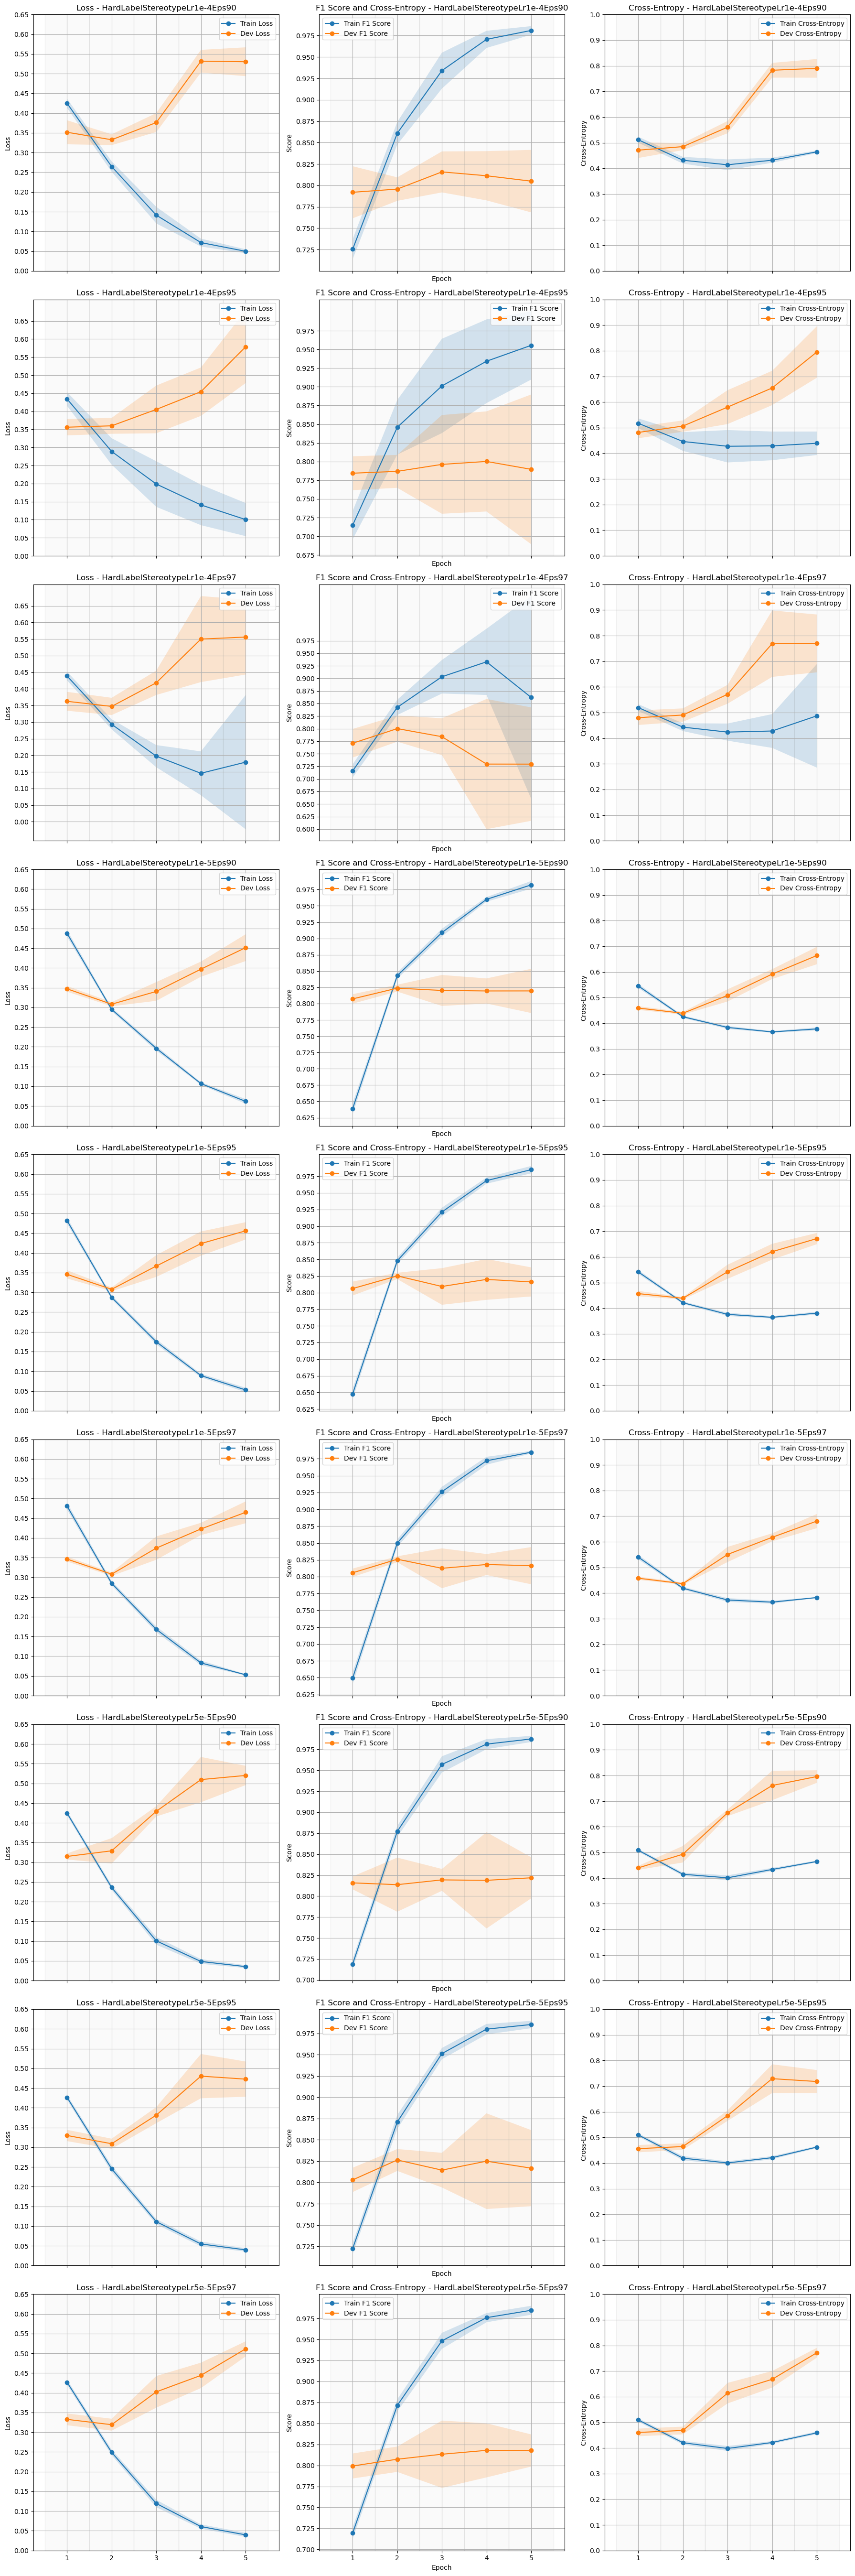

In [102]:
def plot_loss_with_confidence(file_paths):
    num_plots = len(file_paths)
    fig, axes = plt.subplots(num_plots, 3, figsize=(18, 6 * num_plots), sharex=True)

    for idx, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path)
        # Agrupar los datos por epoch
        grouped = df.groupby(['Epoch'])

        # Get unique Run_name
        run_name = df['Run_name'].iloc[0]

        # Plot for loss
        ax_loss = axes[idx, 0]
        ax_loss.set_title('Loss - {}'.format(run_name))
        ax_loss.set_ylabel('Loss')

        # Plot for F1 score and cross-entropy
        ax_metrics = axes[idx, 1]
        ax_metrics.set_title('F1 Score and Cross-Entropy - {}'.format(run_name))
        ax_metrics.set_xlabel('Epoch')
        ax_metrics.set_ylabel('Score')

        # Plot for Cross-Entropy
        ax_ce = axes[idx, 2]
        ax_ce.set_title('Cross-Entropy - {}'.format(run_name))
        ax_ce.set_ylabel('Cross-Entropy')

        train_means = []
        train_std_errs = []
        dev_means = []
        dev_std_errs = []
        f1_train_means = []
        f1_dev_means = []
        ce_train_means = []
        ce_dev_means = []

        for _, group in grouped:
            # Loss
            train_losses = group['train_loss']
            dev_losses = group['dev_loss']
            
            train_mean = train_losses.mean()
            dev_mean = dev_losses.mean()
            
            train_std = train_losses.std()
            dev_std = dev_losses.std()
            
            num_folds = len(group['Fold'].unique())
            confidence_multiplier = 1.96  # para un nivel de confianza del 95%

            train_std_err = confidence_multiplier * (train_std / np.sqrt(num_folds))
            dev_std_err = confidence_multiplier * (dev_std / np.sqrt(num_folds))
            
            train_means.append(train_mean)
            train_std_errs.append(train_std_err)
            dev_means.append(dev_mean)
            dev_std_errs.append(dev_std)

            # F1 Score and Cross-Entropy
            f1_train = group[group['Data'] == 'train']['f1'].mean()
            f1_dev = group[group['Data'] == 'dev']['f1'].mean()
            ce_train = group[group['Data'] == 'train']['ce'].mean()
            ce_dev = group[group['Data'] == 'dev']['ce'].mean()

            f1_train_means.append(f1_train)
            f1_dev_means.append(f1_dev)
            ce_train_means.append(ce_train)
            ce_dev_means.append(ce_dev)

        # Convertir listas a arrays numpy
        epochs = np.arange(1, len(train_means) + 1)  # Generar epochs aplanadas
        train_means = np.array(train_means)
        train_std_errs = np.array(train_std_errs)
        dev_means = np.array(dev_means)
        dev_std_errs = np.array(dev_std_errs)

        f1_train_means = np.array(f1_train_means)
        f1_dev_means = np.array(f1_dev_means)
        ce_train_means = np.array(ce_train_means)
        ce_dev_means = np.array(ce_dev_means)

        # Graficar los resultados de Loss
        ax_loss.plot(epochs, train_means, label='Train Loss', marker='o')
        ax_loss.fill_between(epochs, train_means - train_std_errs, train_means + train_std_errs, alpha=0.2)

        ax_loss.plot(epochs, dev_means, label='Dev Loss', marker='o')
        ax_loss.fill_between(epochs, dev_means - dev_std_errs, dev_means + dev_std_errs, alpha=0.2)
        ax_loss.set_yticks(np.arange(0, .66, 0.05))
        ax_loss.legend()
        ax_loss.grid(True)

        # Graficar los resultados de F1 Score y Cross-Entropy
        ax_metrics.plot(epochs, f1_train_means, label='Train F1 Score', marker='o')
        ax_metrics.plot(epochs, f1_dev_means, label='Dev F1 Score', marker='o')
        ax_metrics.set_yticks(np.arange(0, 1, 0.025))

        ax_metrics.fill_between(epochs, f1_train_means - train_std_errs, f1_train_means + train_std_errs, alpha=0.2)
        ax_metrics.fill_between(epochs, f1_dev_means - dev_std_errs, f1_dev_means + dev_std_errs, alpha=0.2)

        ax_metrics.legend()
        ax_metrics.grid(True)

        # Plot Cross-Entropy
        ax_ce.plot(epochs, ce_train_means, label='Train Cross-Entropy', marker='o')
        ax_ce.plot(epochs, ce_dev_means, label='Dev Cross-Entropy', marker='o')

        ax_ce.fill_between(epochs, ce_train_means - train_std_errs, ce_train_means + train_std_errs, alpha=0.2)
        ax_ce.fill_between(epochs, ce_dev_means - dev_std_errs, ce_dev_means + dev_std_errs, alpha=0.2)

        ax_ce.legend()
        ax_ce.grid(True)
        ax_ce.set_yticks(np.arange(0, 1.1, 0.1))

    plt.tight_layout()
    plt.show()

menoscinco = [x for x in hard_label_files if "1e-5" in x]
plot_loss_with_confidence(sorted(hard_label_files))

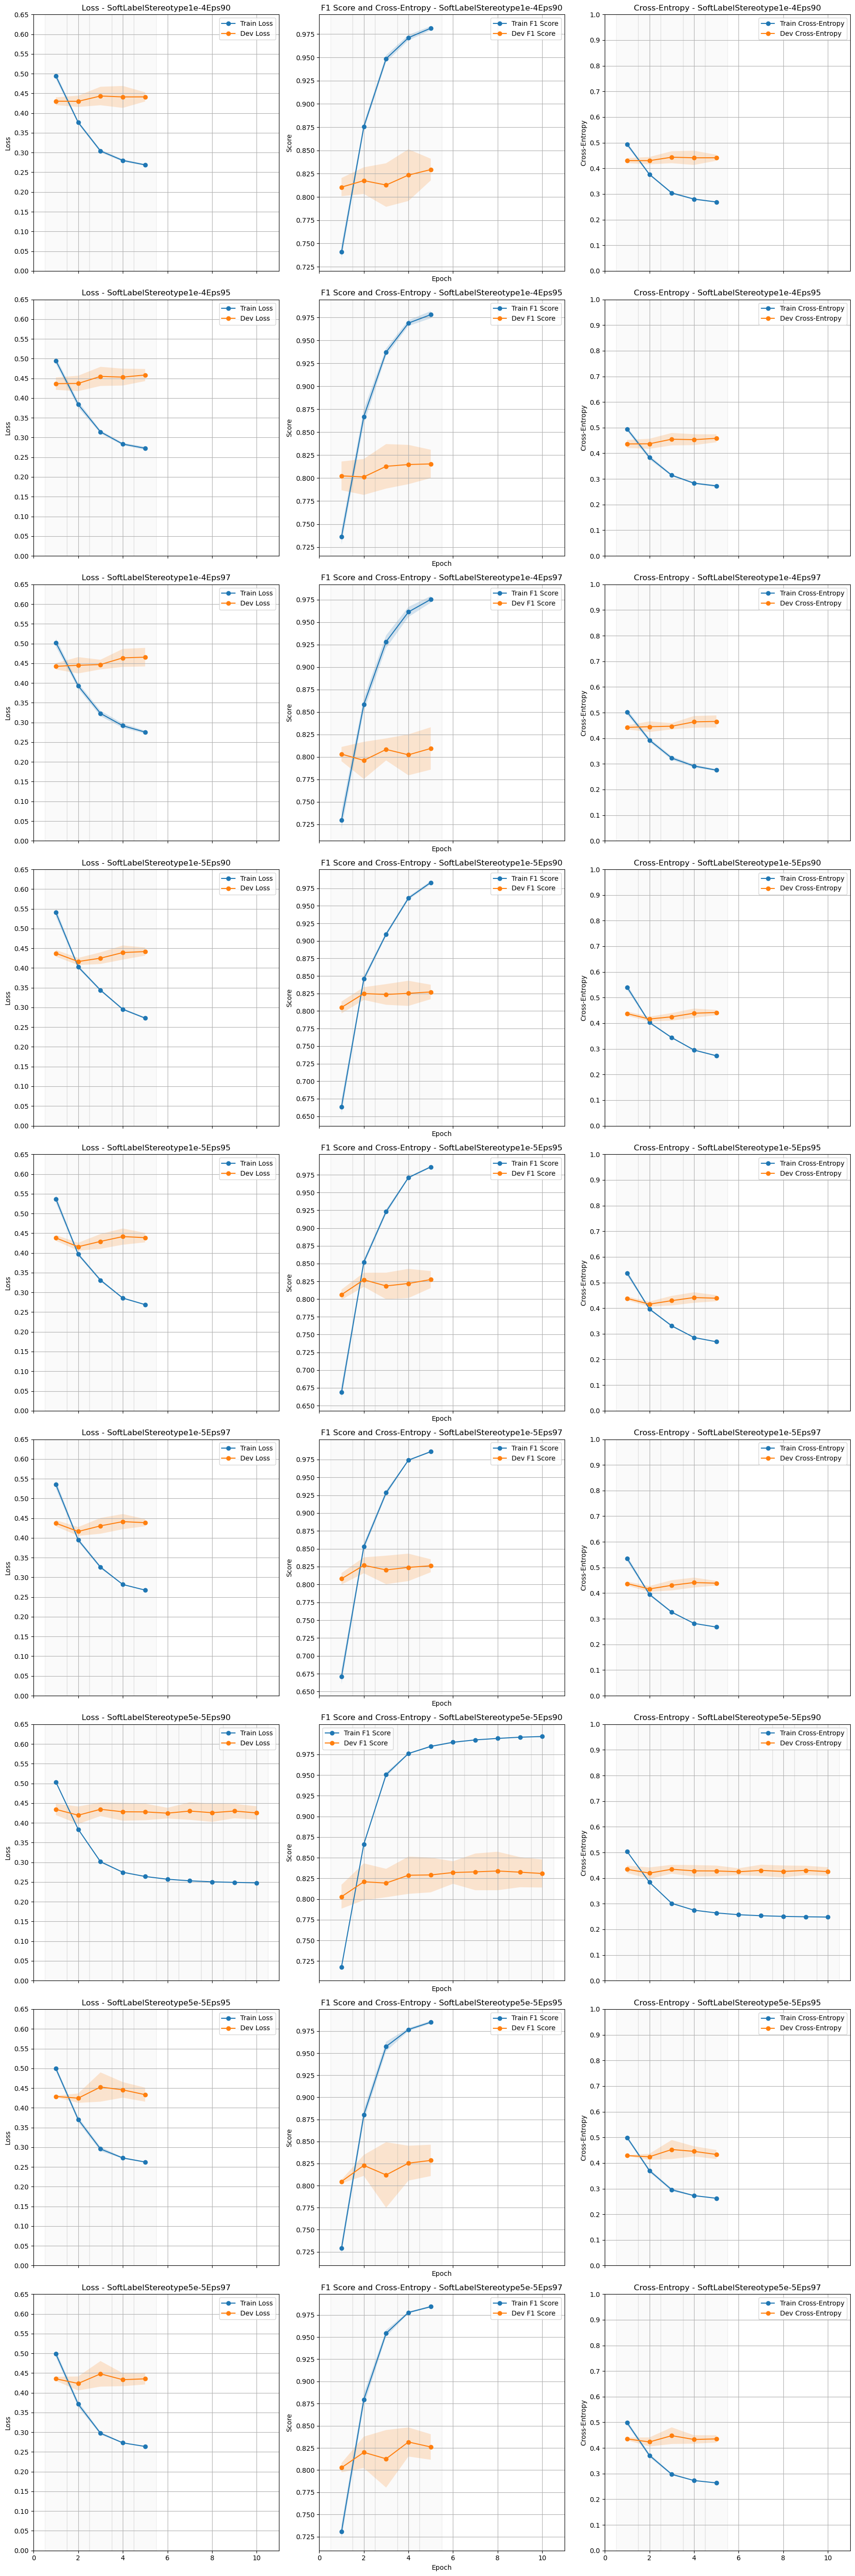

In [103]:
plot_loss_with_confidence(sorted(soft_label_files))

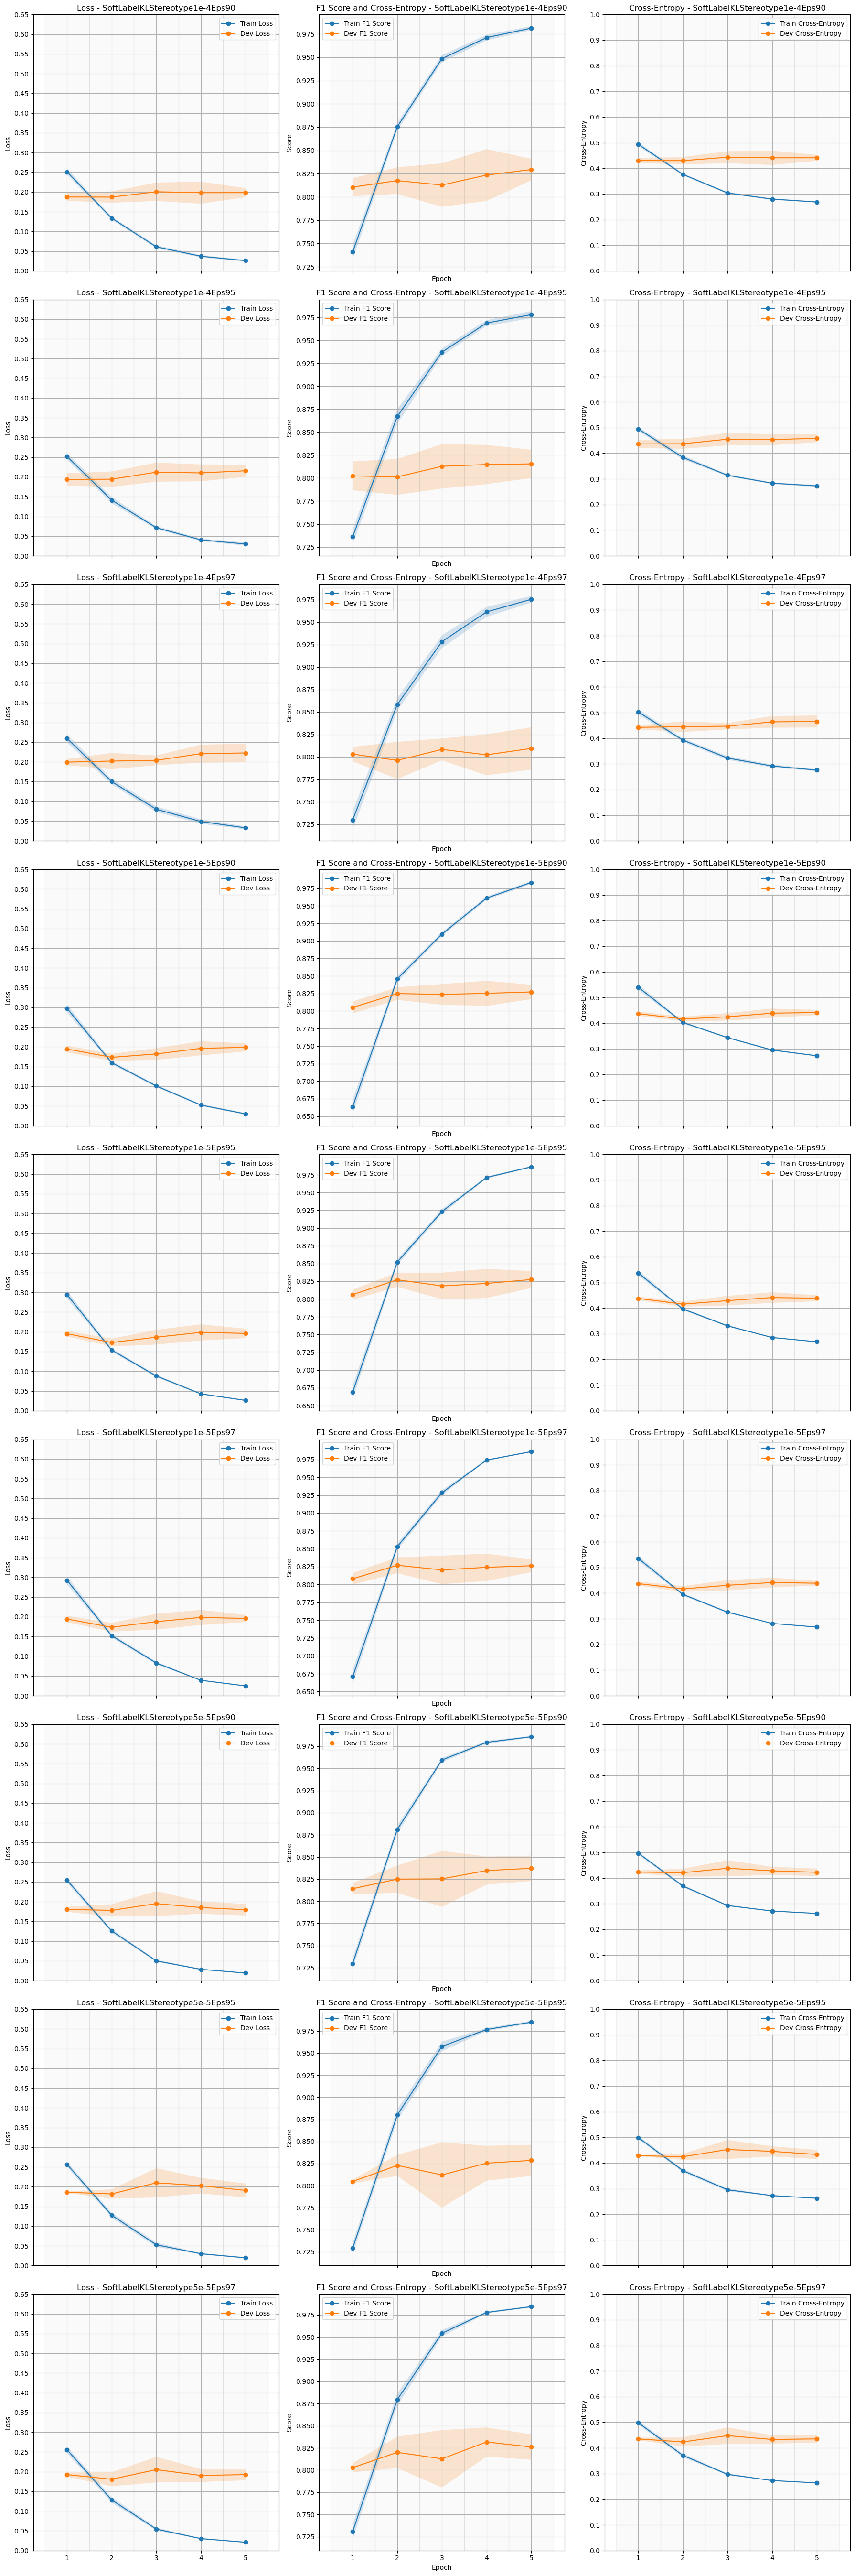

In [104]:
plot_loss_with_confidence(sorted(kl_label_files))